# Hyperparameter Optimization Analysis

Comparative analysis of evolutionary algorithms (GA, DE, PSO) vs traditional methods (Grid Search, Random Search) on MNIST and CIFAR-10 datasets.

**Author:** Kai Cho  
**Institution:** Auckland University of Technology  
**Date:** October 2025

## 1. Setup and Data Loading

In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from scipy import stats
from scipy.stats import f_oneway, ttest_rel, levene
 
plt.style.use('seaborn-v0_8-paper')
sns.set_palette("husl")
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300

print("Libraries loaded")

Libraries loaded


In [2]:
# Load results
results_dir = Path('../results')

# MNIST
mnist_data = {
    'Grid': json.load(open(results_dir / 'grid_mnist_20251028_102120.json')),
    'Random': json.load(open(results_dir / 'random_mnist_20251028_130314.json')),
    'GA': json.load(open(results_dir / 'ga_mnist_20251028_001919.json')),
    'PSO': json.load(open(results_dir / 'pso_mnist_20251028_030759.json')),
    'DE': json.load(open(results_dir / 'de_mnist_20251028_025251.json'))
}

# CIFAR-10
cifar10_data = {
    'Grid': json.load(open(results_dir / 'grid_cifar10_20251028_210132.json')),
    'Random': json.load(open(results_dir / 'random_cifar10_20251028_205921.json')),
    'GA': json.load(open(results_dir / 'ga_cifar10_20251028_210815.json')),
    'PSO': json.load(open(results_dir / 'pso_cifar10_20251028_210830.json')),
    'DE': json.load(open(results_dir / 'de_cifar10_20251028_210845.json'))
}

print(f"Loaded {len(mnist_data)} MNIST and {len(cifar10_data)} CIFAR-10 algorithms")

Loaded 5 MNIST and 5 CIFAR-10 algorithms


## 2. Calculate Statistics

In [3]:
# Calculate statistics for MNIST
mnist_stats = {}
for algo, data in mnist_data.items():
    accuracies = [run['best_fitness'] for run in data['runs']]
    times = [run['time_seconds'] / 3600 for run in data['runs']]
    
    mnist_stats[algo] = {
        'accuracies': accuracies,
        'mean': np.mean(accuracies),
        'std': np.std(accuracies),
        'min': np.min(accuracies),
        'max': np.max(accuracies),
        'avg_time': np.mean(times)
    }

# Calculate statistics for CIFAR-10
cifar10_stats = {}
for algo, data in cifar10_data.items():
    accuracies = [run['best_fitness'] for run in data['runs']]
    times = [run['time_seconds'] / 3600 for run in data['runs']]
    
    cifar10_stats[algo] = {
        'accuracies': accuracies,
        'mean': np.mean(accuracies),
        'std': np.std(accuracies),
        'min': np.min(accuracies),
        'max': np.max(accuracies),
        'avg_time': np.mean(times)
    }

print("Statistics calculated")

Statistics calculated


## 3. Performance Summary Tables

In [4]:
# MNIST table
mnist_table = []
for algo in sorted(mnist_stats.keys(), key=lambda x: mnist_stats[x]['mean'], reverse=True):
    s = mnist_stats[algo]
    mnist_table.append({
        'Algorithm': algo,
        'Mean (%)': f"{s['mean']:.2f}",
        'Std (%)': f"{s['std']:.2f}",
        'Min (%)': f"{s['min']:.2f}",
        'Max (%)': f"{s['max']:.2f}",
        'Time (h)': f"{s['avg_time']:.2f}"
    })

print("=== MNIST Performance ===")
print(pd.DataFrame(mnist_table).to_string(index=False))

=== MNIST Performance ===
Algorithm Mean (%) Std (%) Min (%) Max (%) Time (h)
       DE    98.36    0.01   98.34   98.38     3.81
     Grid    98.27    0.03   98.24   98.32     1.03
      PSO    98.22    0.07   98.17   98.32     3.89
       GA    98.21    0.10   98.08   98.28     2.96
   Random    98.06    0.23   97.74   98.27     0.86


In [5]:
# CIFAR-10 table
cifar10_table = []
for algo in sorted(cifar10_stats.keys(), key=lambda x: cifar10_stats[x]['mean'], reverse=True):
    s = cifar10_stats[algo]
    cifar10_table.append({
        'Algorithm': algo,
        'Mean (%)': f"{s['mean']:.2f}",
        'Std (%)': f"{s['std']:.2f}",
        'Min (%)': f"{s['min']:.2f}",
        'Max (%)': f"{s['max']:.2f}",
        'Time (h)': f"{s['avg_time']:.2f}"
    })

print("=== CIFAR-10 Performance ===")
print(pd.DataFrame(cifar10_table).to_string(index=False))

=== CIFAR-10 Performance ===
Algorithm Mean (%) Std (%) Min (%) Max (%) Time (h)
       DE    82.91    0.16   82.74   83.12     8.71
      PSO    81.26    0.35   80.83   81.68     8.28
       GA    81.01    0.27   80.72   81.37     7.66
   Random    77.77    0.48   77.11   78.24     0.98
     Grid    76.44    0.29   76.09   76.81     1.13


## 4. Performance Visualizations

/var/folders/86/_9q8k9vj4232chyb07p3cwym0000gn/T/ipykernel_47910/4199944664.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp1 = ax1.boxplot(mnist_values, labels=['Grid', 'Random', 'GA', 'PSO', 'DE'],
/var/folders/86/_9q8k9vj4232chyb07p3cwym0000gn/T/ipykernel_47910/4199944664.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp2 = ax2.boxplot(cifar10_values, labels=['Grid', 'Random', 'GA', 'PSO', 'DE'],


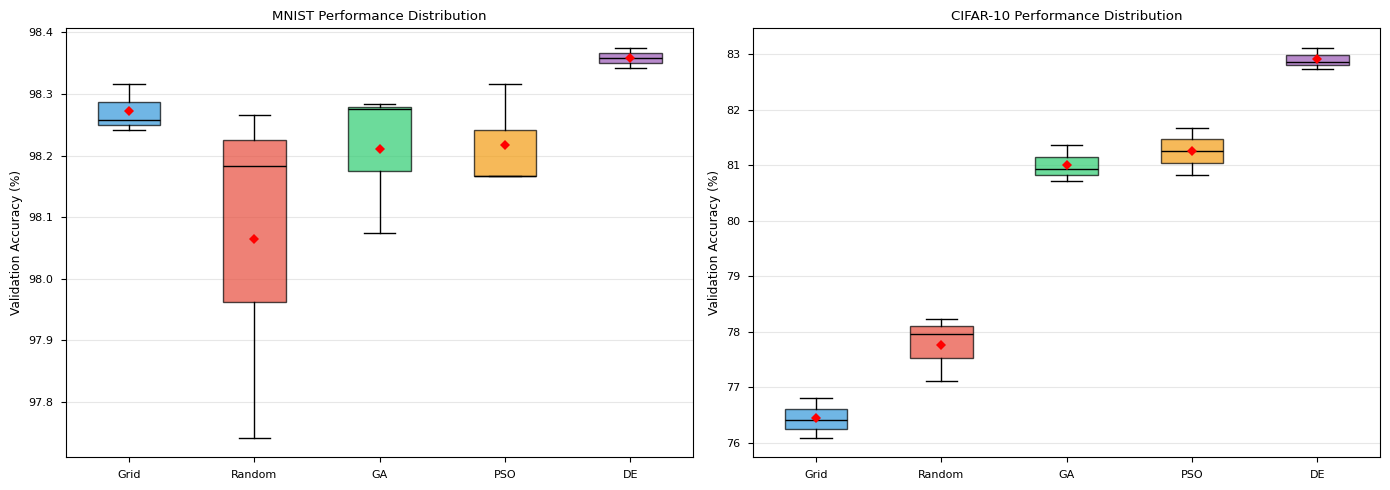

In [6]:
# Box plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# MNIST
mnist_values = [mnist_stats[a]['accuracies'] for a in ['Grid', 'Random', 'GA', 'PSO', 'DE']]
bp1 = ax1.boxplot(mnist_values, labels=['Grid', 'Random', 'GA', 'PSO', 'DE'], 
                  patch_artist=True, showmeans=True, 
                  meanprops=dict(marker='D', markerfacecolor='red', markeredgecolor='red', markersize=5),
                  medianprops=dict(color='black', linewidth=1))
for patch, color in zip(bp1['boxes'], ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6']):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax1.set_ylabel('Validation Accuracy (%)')
ax1.set_title('MNIST Performance Distribution')
ax1.grid(axis='y', alpha=0.3)

# CIFAR-10
cifar10_values = [cifar10_stats[a]['accuracies'] for a in ['Grid', 'Random', 'GA', 'PSO', 'DE']]
bp2 = ax2.boxplot(cifar10_values, labels=['Grid', 'Random', 'GA', 'PSO', 'DE'], 
                  patch_artist=True, showmeans=True,
                  meanprops=dict(marker='D', markerfacecolor='red', markeredgecolor='red', markersize=5),
                  medianprops=dict(color='black', linewidth=1))
for patch, color in zip(bp2['boxes'], ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6']):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax2.set_ylabel('Validation Accuracy (%)')
ax2.set_title('CIFAR-10 Performance Distribution')
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../figures/performance_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()

## 5. Convergence Curves

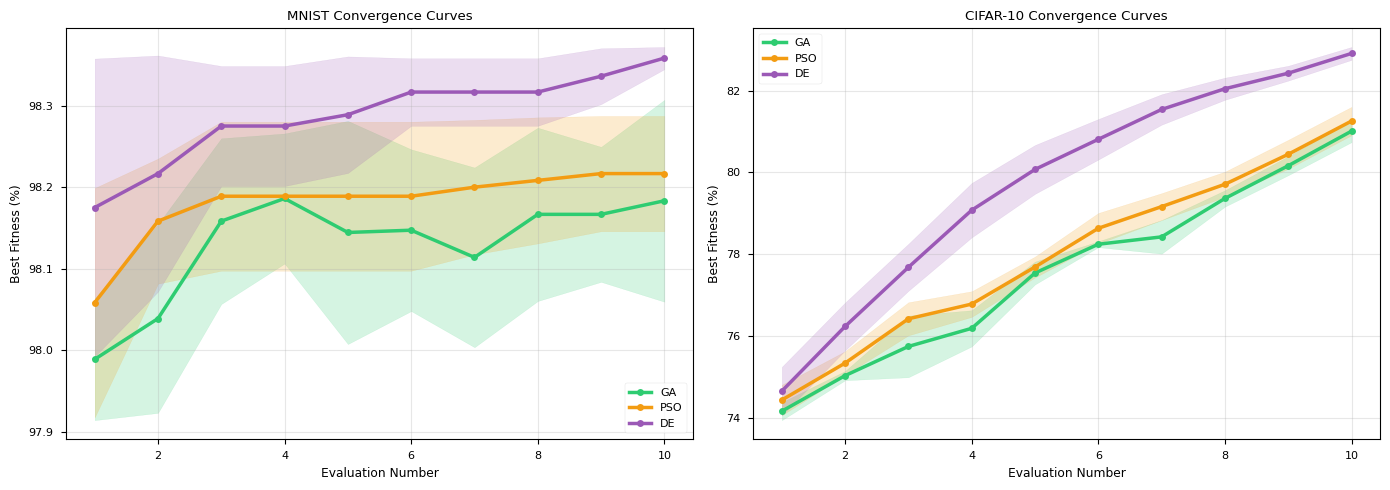

In [7]:
# Convergence curves for evolutionary algorithms
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
colors = {'GA': '#2ecc71', 'PSO': '#f39c12', 'DE': '#9b59b6'}

# MNIST convergence
for algo in ['GA', 'PSO', 'DE']:
    all_histories = []
    for run in mnist_data[algo]['runs']:
        history = [h if isinstance(h, (int, float)) else h.get('fitness', h) 
                  for h in run['evaluation_history']]
        all_histories.append(history)
    
    max_len = max(len(h) for h in all_histories)
    mean_history = [np.mean([h[i] if i < len(h) else h[-1] for h in all_histories]) 
                    for i in range(max_len)]
    std_history = [np.std([h[i] if i < len(h) else h[-1] for h in all_histories]) 
                   for i in range(max_len)]
    
    x = range(1, len(mean_history) + 1)
    ax1.plot(x, mean_history, label=algo, color=colors[algo], linewidth=2.5, marker='o', markersize=5)
    ax1.fill_between(x, np.array(mean_history) - np.array(std_history), 
                     np.array(mean_history) + np.array(std_history), alpha=0.2, color=colors[algo])

ax1.set_xlabel('Evaluation Number')
ax1.set_ylabel('Best Fitness (%)')
ax1.set_title('MNIST Convergence Curves')
ax1.legend()
ax1.grid(True, alpha=0.3)

# CIFAR-10 convergence
for algo in ['GA', 'PSO', 'DE']:
    all_histories = []
    for run in cifar10_data[algo]['runs']:
        history = [h if isinstance(h, (int, float)) else h.get('fitness', h) 
                  for h in run['evaluation_history']]
        all_histories.append(history)
    
    max_len = max(len(h) for h in all_histories)
    mean_history = [np.mean([h[i] if i < len(h) else h[-1] for h in all_histories]) 
                    for i in range(max_len)]
    std_history = [np.std([h[i] if i < len(h) else h[-1] for h in all_histories]) 
                   for i in range(max_len)]
    
    x = range(1, len(mean_history) + 1)
    ax2.plot(x, mean_history, label=algo, color=colors[algo], linewidth=2.5, marker='o', markersize=5)
    ax2.fill_between(x, np.array(mean_history) - np.array(std_history), 
                     np.array(mean_history) + np.array(std_history), alpha=0.2, color=colors[algo])

ax2.set_xlabel('Evaluation Number')
ax2.set_ylabel('Best Fitness (%)')
ax2.set_title('CIFAR-10 Convergence Curves')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../figures/convergence_curves.png', dpi=300, bbox_inches='tight')
plt.show()

## 6. Statistical Tests

In [8]:
# Cohen's d effect size
def cohens_d(group1, group2):
    mean1, mean2 = np.mean(group1), np.mean(group2)
    std1, std2 = np.std(group1, ddof=1), np.std(group2, ddof=1)
    n1, n2 = len(group1), len(group2)
    pooled_std = np.sqrt(((n1-1)*std1**2 + (n2-1)*std2**2) / (n1 + n2 - 2))
    return (mean2 - mean1) / pooled_std if pooled_std > 0 else 0

# Pairwise t-tests
print("=== Pairwise T-Tests ===\n")
comparisons = [('DE', 'Grid'), ('DE', 'Random'), ('GA', 'Grid'), ('GA', 'Random'), ('PSO', 'Grid'), ('PSO', 'Random')]

for dataset_name, stats_dict in [('MNIST', mnist_stats), ('CIFAR-10', cifar10_stats)]:
    print(f"{dataset_name}:")
    for algo1, algo2 in comparisons:
        group1 = stats_dict[algo1]['accuracies']
        group2 = stats_dict[algo2]['accuracies']
        t_stat, p_value = ttest_rel(group1, group2)
        d = cohens_d(group2, group1)
        mean_diff = np.mean(group1) - np.mean(group2)
        
        if p_value < 0.001:
            sig = "highly significant"
        elif p_value < 0.01:
            sig = "very significant"
        elif p_value < 0.05:
            sig = "significant"
        else:
            sig = "not significant"
            
        print(f"  {algo1} vs {algo2}: diff={mean_diff:+.2f}%, t={t_stat:.2f}, p={p_value:.4f} ({sig}), d={d:.2f}")
    print()

=== Pairwise T-Tests ===

MNIST:
  DE vs Grid: diff=+0.09%, t=3.25, p=0.0831 (not significant), d=2.85
  DE vs Random: diff=+0.29%, t=1.82, p=0.2103 (not significant), d=1.47
  GA vs Grid: diff=-0.06%, t=-1.12, p=0.3802 (not significant), d=-0.70
  GA vs Random: diff=+0.15%, t=0.69, p=0.5617 (not significant), d=0.68
  PSO vs Grid: diff=-0.06%, t=-1.97, p=0.1876 (not significant), d=-0.83
  PSO vs Random: diff=+0.15%, t=0.72, p=0.5468 (not significant), d=0.73

CIFAR-10:
  DE vs Grid: diff=+6.47%, t=41.73, p=0.0006 (highly significant), d=22.38
  DE vs Random: diff=+5.14%, t=16.51, p=0.0036 (very significant), d=11.74
  GA vs Grid: diff=+4.57%, t=19.15, p=0.0027 (very significant), d=13.21
  GA vs Random: diff=+3.24%, t=11.73, p=0.0072 (very significant), d=6.79
  PSO vs Grid: diff=+4.82%, t=20.33, p=0.0024 (very significant), d=12.22
  PSO vs Random: diff=+3.49%, t=14.94, p=0.0044 (very significant), d=6.79



In [9]:
# ANOVA
print("=== One-Way ANOVA ===\n")
algorithms = ['Grid', 'Random', 'GA', 'PSO', 'DE']

for dataset_name, stats_dict in [('MNIST', mnist_stats), ('CIFAR-10', cifar10_stats)]:
    groups = [stats_dict[algo]['accuracies'] for algo in algorithms]
    f_stat, p_value = f_oneway(*groups)
    
    if p_value < 0.001:
        sig = "highly significant"
    elif p_value < 0.01:
        sig = "very significant"
    elif p_value < 0.05:
        sig = "significant"
    else:
        sig = "not significant"
    
    print(f"{dataset_name}:")
    print(f"  F-statistic: {f_stat:.4f}, p-value: {p_value:.6f} ({sig})")
    print(f"  {'Significant differences exist' if p_value < 0.05 else 'No significant differences'}\n")

=== One-Way ANOVA ===

MNIST:
  F-statistic: 1.6855, p-value: 0.229114 (not significant)
  No significant differences

CIFAR-10:
  F-statistic: 133.6701, p-value: 0.000000 (highly significant)
  Significant differences exist



## 7. Dataset Complexity Analysis

In [10]:
# Performance ceiling comparison
mnist_baseline = max([mnist_stats[a]['mean'] for a in ['Grid', 'Random']])
mnist_evo = max([mnist_stats[a]['mean'] for a in ['GA', 'PSO', 'DE']])
cifar10_baseline = max([cifar10_stats[a]['mean'] for a in ['Grid', 'Random']])
cifar10_evo = max([cifar10_stats[a]['mean'] for a in ['GA', 'PSO', 'DE']])

comparison_data = {
    'Metric': ['Baseline Best', 'Evolutionary Best', 'Improvement'],
    'MNIST': [f"{mnist_baseline:.2f}%", f"{mnist_evo:.2f}%", f"{mnist_evo - mnist_baseline:.2f}%"],
    'CIFAR-10': [f"{cifar10_baseline:.2f}%", f"{cifar10_evo:.2f}%", f"{cifar10_evo - cifar10_baseline:.2f}%"]
}

print("=== Performance Ceiling Analysis ===")
print(pd.DataFrame(comparison_data).to_string(index=False))

=== Performance Ceiling Analysis ===
           Metric  MNIST CIFAR-10
    Baseline Best 98.27%   77.77%
Evolutionary Best 98.36%   82.91%
      Improvement  0.09%    5.14%


In [11]:
# Variance comparison
mnist_avg_std = np.mean([mnist_stats[a]['std'] for a in mnist_stats])
cifar10_avg_std = np.mean([cifar10_stats[a]['std'] for a in cifar10_stats])

print(f"\n=== Variance Analysis ===")
print(f"MNIST avg std: {mnist_avg_std:.3f}%")
print(f"CIFAR-10 avg std: {cifar10_avg_std:.3f}%")
print(f"Sensitivity ratio: {cifar10_avg_std / mnist_avg_std:.2f}×")


=== Variance Analysis ===
MNIST avg std: 0.089%
CIFAR-10 avg std: 0.310%
Sensitivity ratio: 3.50×


/var/folders/86/_9q8k9vj4232chyb07p3cwym0000gn/T/ipykernel_47910/1967261346.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax2.boxplot([mnist_stds, cifar10_stds], labels=['MNIST', 'CIFAR-10'], patch_artist=True)


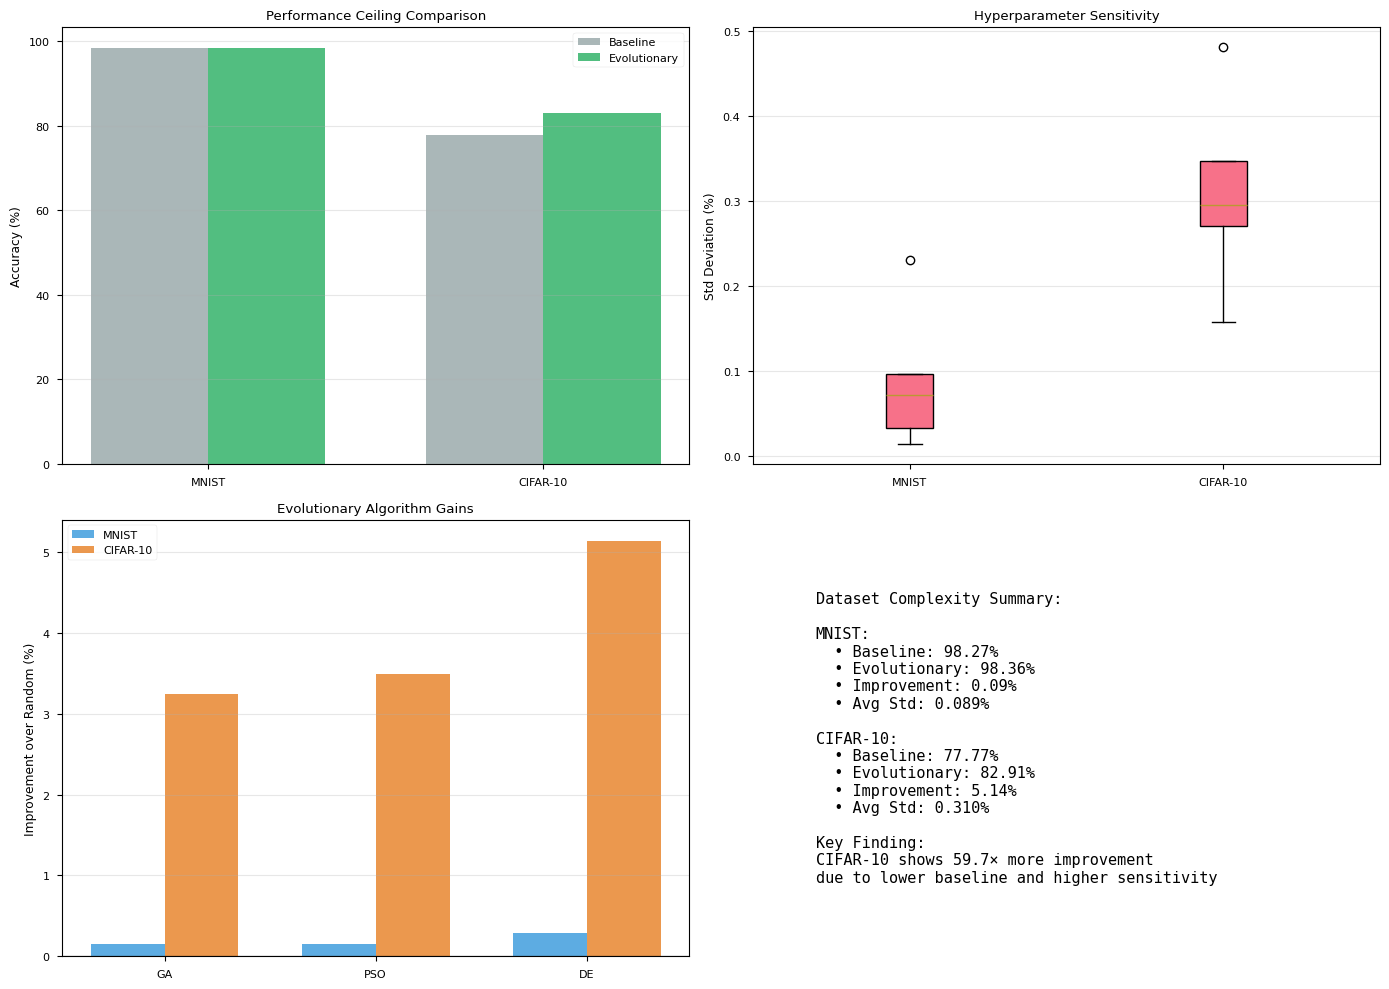

In [12]:
# Visualization: Complexity comparison
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# 1. Performance ceiling bars
datasets = ['MNIST', 'CIFAR-10']
baseline = [mnist_baseline, cifar10_baseline]
evolutionary = [mnist_evo, cifar10_evo]
x = np.arange(len(datasets))
width = 0.35

ax1.bar(x - width/2, baseline, width, label='Baseline', color='#95a5a6', alpha=0.8)
ax1.bar(x + width/2, evolutionary, width, label='Evolutionary', color='#27ae60', alpha=0.8)
ax1.set_ylabel('Accuracy (%)')
ax1.set_title('Performance Ceiling Comparison')
ax1.set_xticks(x)
ax1.set_xticklabels(datasets)
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# 2. Variance boxplot
mnist_stds = [mnist_stats[a]['std'] for a in ['Grid', 'Random', 'GA', 'PSO', 'DE']]
cifar10_stds = [cifar10_stats[a]['std'] for a in ['Grid', 'Random', 'GA', 'PSO', 'DE']]
ax2.boxplot([mnist_stds, cifar10_stds], labels=['MNIST', 'CIFAR-10'], patch_artist=True)
ax2.set_ylabel('Std Deviation (%)')
ax2.set_title('Hyperparameter Sensitivity')
ax2.grid(axis='y', alpha=0.3)

# 3. Relative improvements
mnist_random = mnist_stats['Random']['mean']
cifar10_random = cifar10_stats['Random']['mean']
mnist_impr = [mnist_stats[a]['mean'] - mnist_random for a in ['GA', 'PSO', 'DE']]
cifar10_impr = [cifar10_stats[a]['mean'] - cifar10_random for a in ['GA', 'PSO', 'DE']]

x = np.arange(3)
ax3.bar(x - width/2, mnist_impr, width, label='MNIST', color='#3498db', alpha=0.8)
ax3.bar(x + width/2, cifar10_impr, width, label='CIFAR-10', color='#e67e22', alpha=0.8)
ax3.set_ylabel('Improvement over Random (%)')
ax3.set_title('Evolutionary Algorithm Gains')
ax3.set_xticks(x)
ax3.set_xticklabels(['GA', 'PSO', 'DE'])
ax3.legend()
ax3.grid(axis='y', alpha=0.3)
ax3.axhline(y=0, color='black', linestyle='-', linewidth=0.8)

# 4. Summary table as text
ax4.axis('off')
summary_text = f"""
Dataset Complexity Summary:

MNIST:
  • Baseline: {mnist_baseline:.2f}%
  • Evolutionary: {mnist_evo:.2f}%
  • Improvement: {mnist_evo - mnist_baseline:.2f}%
  • Avg Std: {mnist_avg_std:.3f}%
  
CIFAR-10:
  • Baseline: {cifar10_baseline:.2f}%
  • Evolutionary: {cifar10_evo:.2f}%
  • Improvement: {cifar10_evo - cifar10_baseline:.2f}%
  • Avg Std: {cifar10_avg_std:.3f}%
  
Key Finding:
CIFAR-10 shows {(cifar10_evo - cifar10_baseline) / (mnist_evo - mnist_baseline):.1f}× more improvement
due to lower baseline and higher sensitivity
"""
ax4.text(0.1, 0.5, summary_text, fontsize=11, family='monospace', verticalalignment='center')

plt.tight_layout()
plt.savefig('../figures/complexity_analysis.png', dpi=300, bbox_inches='tight')
plt.show()